Ainsley Jordan | DSCI-100-003 | Group 28

## (1) Data Description 
*Players Dataset*
- there are 196 observations and 1372 variables
- the average hours played is 5.85 hours
- the average age of players is 21.14 
- experience, hashedEmail, name and gender are factors
- subscription is logical
- age and played_hours are numerical
- experience refers to the level of play each user is accustomed to (Beginner, Amateur, Regular, Veteran, and Pro), subscription describes whether or not each user would subscribe to a game-related newspaper, hashedEmail holds each users email, name describes each users name they use, age refers to the age the users report for themselves, gender describes how the user identifies (Male, Female, Non-binary, Prefer not to sya, or Two spiritied), and played_hours states how many hours each user has played on the server
- issues within the data could include a couple outliers as most users had below 10 hours, while only a select few have over 50 or even 100 hours, which would scew the data scaling and predictions
- the hashedEmail data is likely irrelevant and not necessary to use


*Sessions Dataset*
- there are 1535 observations and 7675 variables
- hashedEmail, start_time, and end_time are factors
- original_start_time and original_end_time are numeric
- hashedEmail holds each users email, start_time has the date and time (in military time) of each user beginning their play session, end_time has the date and time (in military time) of each user ending their play session, original_start_time
- issues with the datacould be that some users may have idled in game(been logged on but not actually playing the game or navigating the world) which would increase the number of hours but they wouldn't have purposely done anything within the world that could be tracked
- the hashedEmail data is likely irrelevant

## (2) Questions
*Broad question* = What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

*Specific question* = Can the different ages of each player predict the amount of hours played, which in turn can it explain who would subscribe to the game-related newsletter?

Different ages have different responsibilities, with your general responsibilities in life increasing with age. As the player set gets older, they 
would likely have less time to play the game and therefore may be less likely to subscribe to a newsletter. The player dataset shows the age and hours played of each user, with the sessions dataset helping to show what times they logged on. Older players would likely be only able to log on outside of work while younger players may have more free time to play. If younger individuals are more likely to subscribe, maybe it should be catered towards their interests.

## (3) Data Analysis and Visualization

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


(3) Exporatory Data Analysis and Visualization

In [2]:
players <- read_csv("players.csv")|>
    arrange(desc(Age))|>
    select(-hashedEmail)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_hours,name,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
Regular,TRUE,0.3,Andy,Male,58
Amateur,FALSE,0.0,Dylan,Prefer not to say,57
Regular,FALSE,0.0,Balthazar,Male,50
Regular,TRUE,18.5,Dante,Male,49
Amateur,TRUE,0.1,Natalie,Male,47
Veteran,FALSE,0.0,Selena,Male,46
Amateur,FALSE,0.1,Yosef,Male,45
Veteran,TRUE,0.1,Gabriela,Female,44
Beginner,FALSE,0.0,Jude,Female,42


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


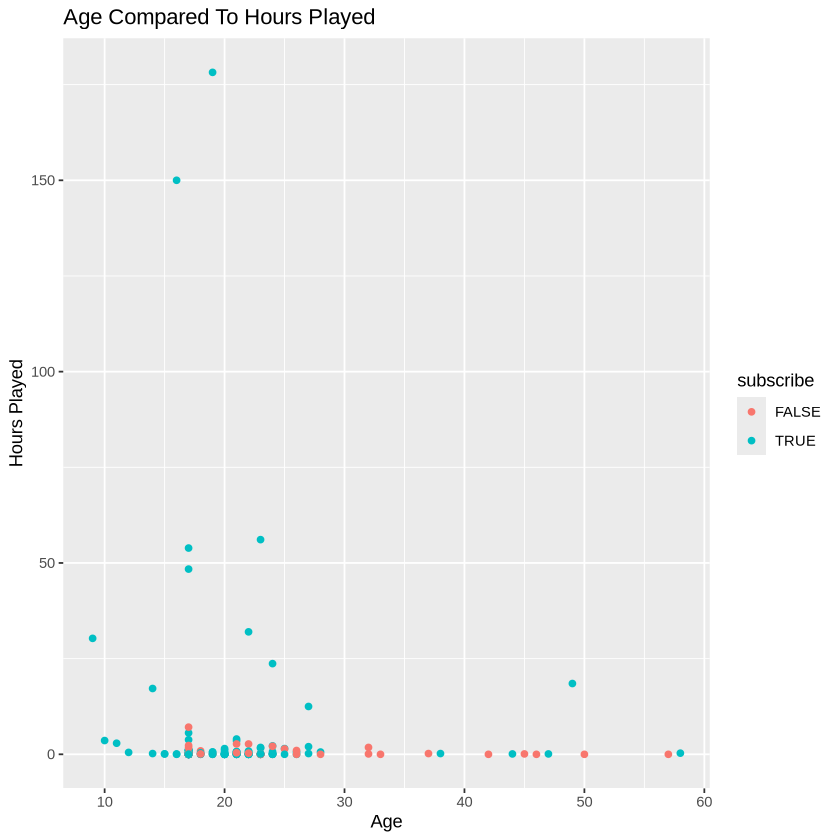

In [3]:
plots <- players|>
    select(-name)|>
    filter(played_hours < 200)|>
    ggplot(aes(x = Age, y = played_hours, colour = subscribe))+
    geom_point()+
    labs(x = "Age", y = "Hours Played", title = "Age Compared To Hours Played")
plots

This plot shows at roughly what age most players are playinng the most and spending the most hours on the game, and which ages of players are playing the least. Those coloured blue are also subscribed, and those with the most hours are subscribedThe outliers in this data however bring the y-axis up really high so it is hard to separate the vast majority of data in the lower hours.

In [4]:
hrs_outlier <- players|>
    filter(played_hours > 10)
hrs_outlier

experience,subscribe,played_hours,name,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
Regular,TRUE,18.5,Dante,Male,49
Veteran,TRUE,12.5,Isidore,Agender,27
Beginner,TRUE,23.7,Isla,Male,24
Amateur,TRUE,56.1,Dana,Male,23
Amateur,TRUE,32.0,Sidney,Male,22
Regular,TRUE,218.1,Akio,Non-binary,20
Regular,TRUE,178.2,Piper,Female,19
Amateur,TRUE,48.4,Xander,Female,17
Amateur,TRUE,53.9,Alex,Male,17


In [5]:
avg <- players|>
    summarize(avg_hrs = mean(played_hours, na.rm = TRUE), avg_age = mean(Age, na.rm = TRUE))
avg

avg_hrs,avg_age
<dbl>,<dbl>
5.845918,21.13918


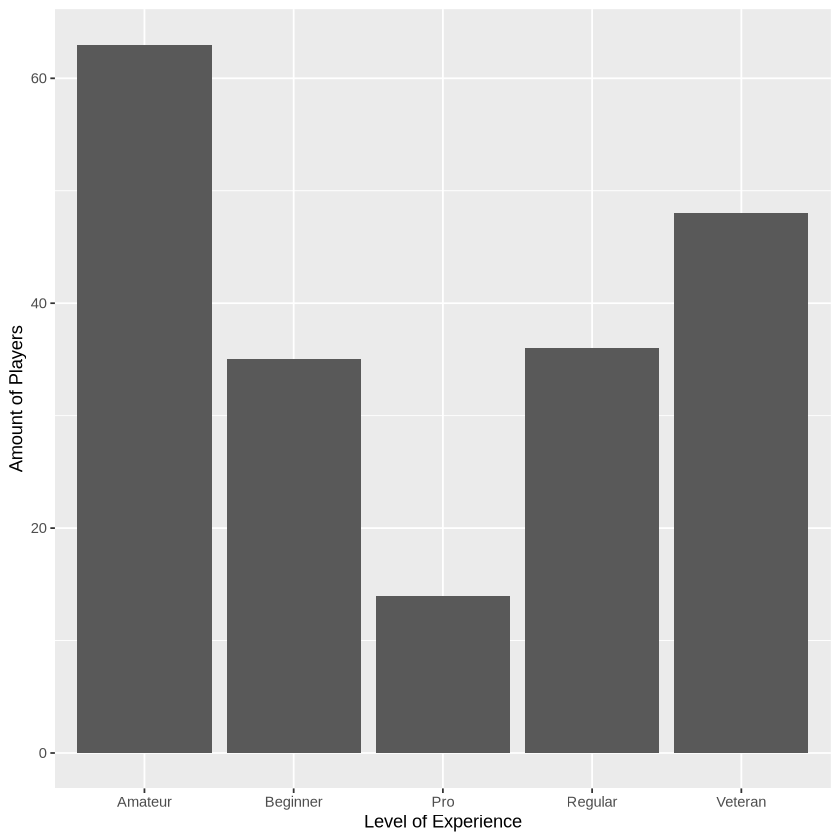

In [13]:
exp_graph <- players|>
    ggplot(aes(x = experience))+
    geom_bar()+
    labs(x = "Level of Experience", y = "Amount of Players")
exp_graph

This graph shows the 

In [7]:
sessions <- read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


## (4) Methods and Plan 
This question could be answered by wrangling the data (specifically the player dataset) so that age, hours played, subscription, and experience are the only columns.  K-nearest neighbour classification model can then be used to predict the subscription of players based on the hours played and ages. The hours played and age values would need to be standardized and categorical variables must become a factor type. This is appropriate because it would provide a clear visual answer to a prediction question, k-nn allows us to see whether based on age and hours how likely they are to be subscribed based on the values of other players. No clear trend appears immediately in the data between age/hours played and subscription, so a linear regression model may not be appropriate. Linear regression also cannot be used to predict subscribed compared to not subscribed (binary data). An assumption would be that each user individually put in their experience level as they thought how it reflected their playing style, rather than chosen for them based on hours played. Potential weaknesses could come from the outliers in hours played, where certain users have significantly more hours than the majority, which could scew the predictions. Hours played and age will be scaled to be normalized and data would be further tidied. Afterwards, data will be split 70/30 to make a training and testing set, respectively. This testing set can be used to do cross-validation.

## (5) GitHub Repository
https://github.com/ainsleyj951-png/dsci-100-project-2-